In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
import pandas as pd

In [2]:
import kid_readout.analysis.archive

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [3]:
df = kid_readout.analysis.archive.load_archive('/data/detectors/archive/2015-01-14_145435_continous_cooling.npy')

In [4]:
df.shape

(672, 88)

In [5]:
df2 = kid_readout.analysis.archive.load_archive('/data/detectors/archive/2015-02-13_120307_led.npy')

In [6]:
df2.shape

(334, 91)

(0.001, 0.1)

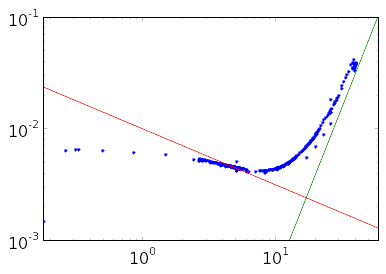

In [67]:
dd = pd.concat((df[df.resonator_id==0],df2[(df2.resonator_id==0) & (df2.timestream_modulation_duty_cycle==1)]))
#plot(dd.sweep_primary_load_temperature,dd.f_0,'.')
loglog(dd.sweep_primary_package_temperature,1-dd.f_0/dd.f_0.max(),'.')
xlim(0,60)
#ylim(1e-3,1e-1)
#loglog(dd.sweep_primary_package_temperature,.7e-2*np.exp(dd.sweep_primary_package_temperature/10)/(dd.sweep_primary_package_temperature**.5))
x = np.linspace(.1,60,10000)
loglog(x,5e-7*x**3)
loglog(x,.1e-1*x**-.5)
ylim(1e-3,1e-1)

In [68]:
2

2

In [69]:
20e-3*120

2.4